<a href="https://colab.research.google.com/github/RagozinaMarina/toxic/blob/master/toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import re
import string
import numpy as np
import pandas as pd
from plotly import graph_objs as go
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          10716        323  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2900         81  1.0              
harshsingh2209/tesla-stock-pricing-20172022                    TESLA stock pricing (2017-2022)                      28KB  2022-09-18 14:56:29            476         22  1.0              
thedevastator/airplane-crashes-

In [ ]:
! kaggle datasets download -d reihanenamdari/youtube-toxicity-data
! unzip youtube-toxicity-data.zip -d youtube-toxicity-data

  0% 0.00/96.8k [00:00<?, ?B/s]
100% 96.8k/96.8k [00:00<00:00, 60.8MB/s]
Archive:  youtube-toxicity-data.zip
  inflating: youtube-toxicity-data/youtoxic_english_1000.csv  


In [ ]:
# ! kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification
# ! unzip jigsaw-multilingual-toxic-comment-classification.zip -d jigsaw-multilingual-toxic-comment-classification

 99% 1.07G/1.08G [00:11<00:00, 117MB/s]
100% 1.08G/1.08G [00:11<00:00, 104MB/s]
Archive:  jigsaw-multilingual-toxic-comment-classification.zip
  inflating: jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/sample_submission.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/test.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/test_labels.csv  
  inflating: jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv  
  

In [ ]:
# import data
data = pd.read_csv('/content/youtube-toxicity-data/youtoxic_english_1000.csv')

In [ ]:
data

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
balance_counts = data.groupby('IsToxic')['IsToxic'].agg('count').values

In [ ]:
# show dataset distribution
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['non_toxic'],
    y=[balance_counts[0]],
    name='non_toxic',
    text=[balance_counts[0]],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=['toxic'],
    y=[balance_counts[1]],
    name='toxic',
    text=[balance_counts[1]],
    textposition='auto'
))
fig.update_layout(
    title='<span>Toxicity distribution</span>'
)
fig.show()

In [ ]:
data['message_len'] = data['Text'].apply(lambda x: len(x.split(' ')))
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,message_len
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,286
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,25
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,77
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,107
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,47


In [ ]:
toxic = data[data['IsToxic'] == True]['message_len'].value_counts().sort_index()
non_toxic = data[data['IsToxic'] == False]['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=toxic.index,
    y=toxic.values,
    name='toxic'
))
fig.add_trace(go.Scatter(
    x=non_toxic.index,
    y=non_toxic.values,
    name='non_toxic'
))
fig.update_layout(
    title='<span>Toxicity and length of text</span>'
)
fig.update_xaxes(range=[0, 140])
fig.show()

In [ ]:
stop_words = stopwords.words('english')
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text

In [ ]:
data['message_clean'] = data['Text'].apply(preprocess_data)
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,message_len,message_clean
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,286,peopl would take step back make case wasnt any...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,25,law enforc train shoot apprehend they train s...
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,77,dont reckon black live matter banner held whi...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,107,larg number peopl like polic offic call crimin...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,47,arab dude absolut right shot extra time shoot...


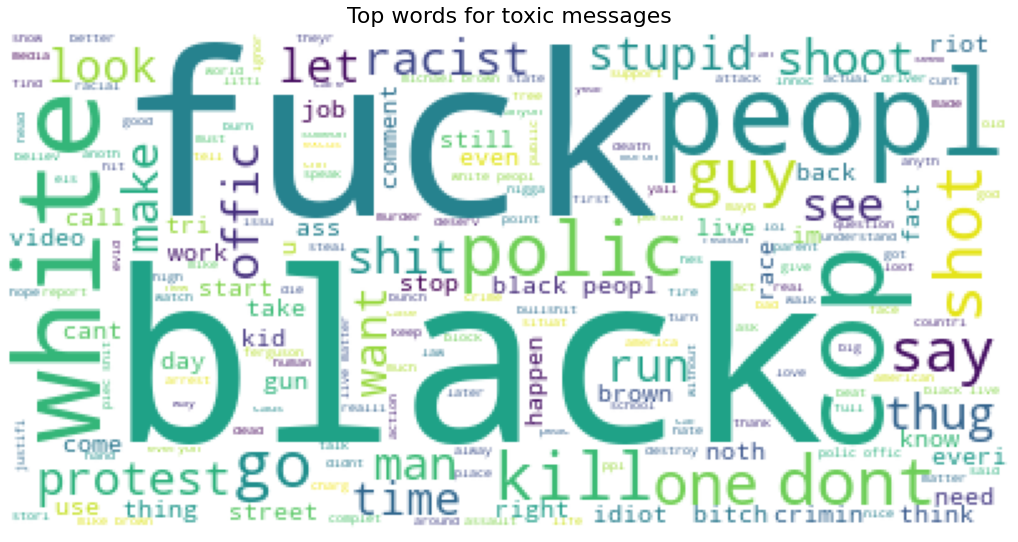

In [ ]:
wc = WordCloud(
    background_color='white', 
    max_words=200
)
wc.generate(' '.join(text for text in data.loc[data['IsToxic'] == True, 'message_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for toxic messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

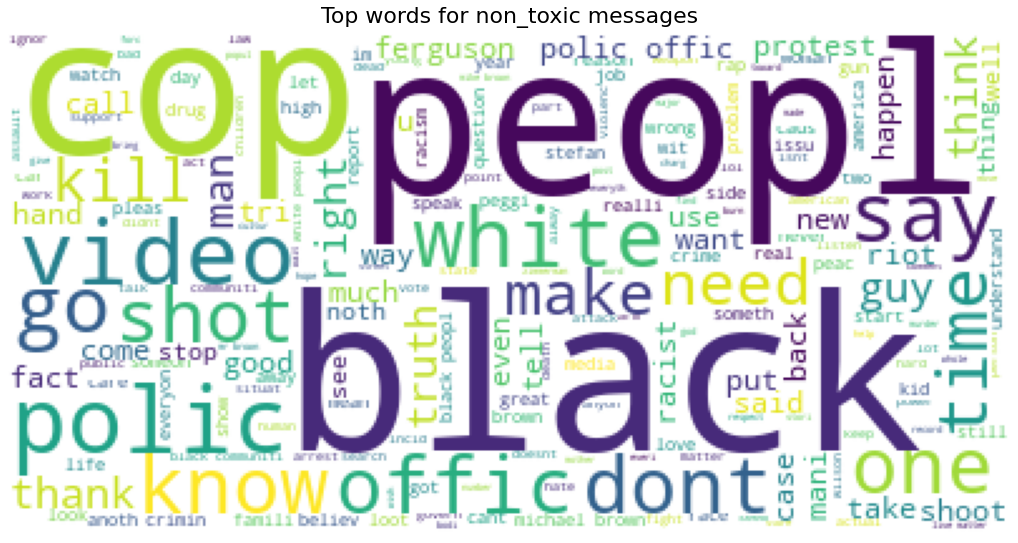

In [ ]:
wc = WordCloud(
    background_color='white', 
    max_words=200
)
wc.generate(' '.join(text for text in data.loc[data['IsToxic'] == False, 'message_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for non_toxic messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["classes"] = le.fit_transform(data['IsToxic'])
# LabelEncoder()
# >>> list(le.classes_)
# ['amsterdam', 'paris', 'tokyo']
# >>> le.transform(["tokyo", "tokyo", "paris"])
# array([2, 2, 1]...)
# >>> list(le.inverse_transform([2, 2, 1]))
# ['tokyo', 'tokyo', 'paris']

In [ ]:
data["classes"]

0      0
1      1
2      1
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: classes, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.message_clean, data["classes"], test_size=0.5, random_state=0)

In [ ]:
x_test

993    white moveout ferguson let see nice becom east...
859    michael brown thug god bless thin blue line gr...
298    want shoot hard wait till one kid get troubl p...
553    finland popul  million polic forc  polic use w...
672                     ever get situat run asshol overi
                             ...                        
647                                          ran everyon
190    someon say way black peopl behav wonder fergus...
361    omg stefan rap hyster anyway good news guess k...
664                            runem theyr freak freeway
375                                    gentl gentl giant
Name: message_clean, Length: 500, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer()

tfidf_transformer.fit(x_train)

TfidfVectorizer()

In [ ]:
y_test

993    1
859    1
298    1
553    0
672    1
      ..
647    1
190    1
361    1
664    1
375    0
Name: classes, Length: 500, dtype: int64

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_emb = tfidf_transformer.transform(x_train)
x_test_emb = tfidf_transformer.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train_emb.toarray(), y_train)
score = gnb.score(x_test_emb.toarray(), y_test)
print(score)

0.578
